In [1]:
import logging
import random

from backstrip import backplot
from nbmetalog import nbmetalog as nbm
import pandas as pd
import pecking
from teeplot import teeplot as tp

random.seed(1)

logging.basicConfig(
    format="[%(funcName)s:%(lineno)d] %(message)s",
)
logger = logging.getLogger()


In [2]:
nbm.print_metadata()


context: ci
hostname: fv-az1040-457
interpreter: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
nbcellexec: null
nbname: benchmark
nbpath: /home/runner/work/hstrat-wafer-scale/hstrat-wafer-scale/binder/benchmark.ipynb
revision: null
session: 1499fd9a-45f6-49f0-b3d2-06726f9d48dc
timestamp: 2024-04-14T14:56:47Z00:00


IPython==8.20.0
keyname==0.6.0
yaml==6.0.1
logging==0.5.1.2
nbmetalog==0.2.6
pandas==1.5.3
pecking==0.2.2
teeplot==1.0.1
re==2.2.1
comm==0.2.1
psutil==5.9.8
zmq==25.1.2
json==2.0.9
ipykernel==6.29.0


## Get Data


In [3]:
df = pd.concat(
    [
        pd.read_csv("https://osf.io/n4xyp/download"),
        pd.read_csv("https://osf.io/egjxr/download"),
    ],
    ignore_index=True,
)


In [4]:
df["Nanoseconds per Op"] = df["Nanoseconds"] / df["Num Operations"]


In [5]:
def divide_by_subset_mean(group):
    group["Trivial Ratio"] = (
        group["Nanoseconds"]
        / group[
            (group["Policy"] == "trivial")
            & (group["Implementation"] == "surface")
        ]["Nanoseconds"].mean()
    )
    return group


result = (
    df.groupby(["Language"], group_keys=True)
    .apply(divide_by_subset_mean)
    .reset_index(drop=True)
)
result.groupby(["Language", "Implementation", "Policy"])["Trivial Ratio"].agg(
    ["mean", "sem"]
)


mean       sem
Language Implementation Policy                                               
Python   column         geom-seq-nth-root                336.375230  3.815625
                        recency-proportional-resolution   41.460680  0.696072
                        steady                            29.056492  0.629651
                        tilted                           139.034474  6.051034
                        trivial                            8.734774  0.145724
         surface        steady                             4.186398  0.048544
                        tilted                             4.129815  0.064143
                        tilted-sticky                      4.003603  0.041232
                        trivial                            1.000000  0.001161
Zig      surface        tilted                            47.119506  0.180661
                        tilted-sticky                     58.119356  0.096292
                        trivial                            1.000000  0.000621

## Visualize Results


/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `At least two samples are required.` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")
/home/runner/.local/lib/python3.10/site-packages/pecking/_skim_lowest.py:184: UserWarning: ValueError `At least two samples are required.` ocurred. No groups skimmed.
  warnings.warn(f"ValueError `{e}` ocurred. No groups skimmed.")
/home/runner/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)
/home/runner/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


/home/runner/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


teeplots/all=false+hue=implementation+orient=h+row=language+score=nanoseconds-per-op+viz=peckplot+x=nanoseconds-per-op+y=policy+y-group=outer+ext=.pdf


teeplots/all=false+hue=implementation+orient=h+row=language+score=nanoseconds-per-op+viz=peckplot+x=nanoseconds-per-op+y=policy+y-group=outer+ext=.png


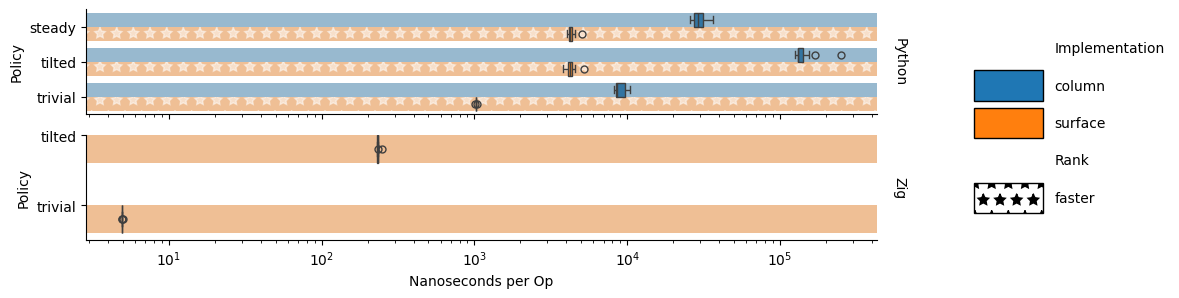

In [6]:
tp.tee(
    pecking.peckplot,
    data=df[
        df["Policy"].isin(
            ["steady", "tilted", "trivial"],
        )
    ],
    y="Policy",
    x="Nanoseconds per Op",
    hue="Implementation",
    score="Nanoseconds per Op",
    row="Language",
    y_group="outer",
    sharey=False,
    orient="h",
    aspect=7,
    height=1.5,
    margin_titles=True,
    skimmers=[pecking.skim_lowest],
    skim_labels=["faster"],
    skim_hatches=["*"],
    log_scale=(True, False),
    facet_kws=dict(gridspec_kws={"wspace": 0.2, "hspace": 0.2}),
    teeplot_outattrs={
        "all": "false",
    },
    teeplot_postprocess="plt.subplots_adjust(right=0.8); teed.axes.flat[1].set_ylim(2.5, 1); teed.set_titles(row_template='{row_name}');",
)
